# Tutorial 1 : Python basics 

<div class="alert alert-block alert-info">
    <b>Learning Outcomes</b>
   
- Data manipulation in python: numpy, matplotlib, pandas
- First steps with scikit-learn

</div>

Python is a popular computer language. We will use it along with 4 libraries: numpy for array handling, pandas for time series, scikit-learn for machine learning tools and matplotlib for plotting. There are *a lot* of resources on the web: the user manual remains the primary location where you should be looking for documentation about a specific function. https://stackoverflow.com/ is also a great source of information since many people before you have already had the same question as you. A good intro to numpy: https://sebastianraschka.com/blog/2020/numpy-intro.html

Even though python is a great language, don't forget that it is an [Interpreted language](https://en.wikipedia.org/wiki/Interpreter_(computing)). That means that python can be very slow. For this reason you should 

- Rely on existing libraries when available
- Write compact code
- Avoid loops

In fact, most modern libraries deffer the heavy lifting part to compiled bits of codes which typically run much faster than your own implementation.

Last, don't forget to comment your codes.

## Numpy for array handling

Numpy is the core library when it comes to manipulating "dense" arrays of numbers and you should always use it instead of raw python lists. Numpy also comes with a couple of linear algebra routines to perform basic operations (matrix multiplication, linear systems, eigenvalue solver). However for large-scale application (and sparse matrices) we will use different libraries (like scipy).

In [490]:
import numpy as np

Vectors are first declared as a list of number and are then converted to numpy arrays. Note that python does not make the difference between row vectors and column vectors: all vectors are treated as rows.

In [491]:
x = np.array([1, 2, 3])
print(x)

[1 2 3]


Matrices are declared as an array of arrays in a similar way as vectors. Note that python is case sensitive

In [492]:
A = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print(A)

[[1 2 3]
 [4 5 6]
 [7 8 9]]


In order to convert a row vector to a column vector, one must add a new dimension as shown below:

In [493]:
x_col = x[:,None]
print(x_col)

[[1]
 [2]
 [3]]


You can compute the transpose of a vector with the method `.T`. However keep in mind that the transpose of a 1d vector does not really make sense *in python*. If you want to transpose a vector in python, it must have at least two dimensions.

> ***Question***
> - Try to transpose `x` and `x_col` and check their dimensions.
- Hint: You can always check the dimensions of your array with the method `.shape`.

In [494]:
print(x)
print(x.shape)
x = x.T
x_col = x_col.T
print(x_col)
print(x_col.shape)
print(x_col.T)

[1 2 3]
(3,)
[[1 2 3]]
(1, 3)
[[1]
 [2]
 [3]]


Matrix multiplication can be achieved with `np.dot`, `np.matmul` or `@`.
> ***Question***
> - Pick the one you prefer to compute $\mathbf A \mathbf x$, $\mathbf x \mathbf x^\top$, and $\mathbf x^\top \mathbf x$.

- Hint: Did I already warn you about transposing 1d vectors in python?

With the  vectors and matrices defined above, you should get:
$\mathbf A \mathbf x = [14, 32, 50]^\top$

\begin{align}
 \mathbf x \mathbf x^\top = &= \begin{bmatrix}
    1 & 2 & 3\\
    2 & 4 & 6\\
    3 & 6 &  9 \\
  \end{bmatrix}
\end{align}

and 
$\mathbf x^\top \mathbf x = 14$

In [495]:
print(A@x)


[14 32 50]


You can access the first element of an array with `x[0]` and the last element with `x[-1]`. You can also select a subset using slices like `x[0:2]` (or `x[:2]`). Be careful that the last index of the slice is not part of the subset.

> ***Question***
> - Can you select the last two element of the vector $\mathbf x$ with negative indices?

In [496]:
print(x[-1], x[-2])

3 2


Numpy comes with the standard math function `np.exp`, `np.sqrt`, `np.sin`. Each of these functions applied to an array is applied element-wise. For instance `A**2` raises each element of `A` to the power of 2.

> ***Question***
> - Is `A*A` the same as `A@A`?

In [497]:
print(A*A, "\n\n",A@A)

[[ 1  4  9]
 [16 25 36]
 [49 64 81]] 

 [[ 30  36  42]
 [ 66  81  96]
 [102 126 150]]


### Broadcasting

In python, we can add, subtract, multiply, (etc.) arrays elementwise. In this context arrays have to be of the same size. But when we do `A+1`, we add the scalar `1` to each element of the array `A`. This type of operation is called [broadcasting](https://numpy.org/doc/stable/user/basics.broadcasting.html). 

> ***Question***
> - Check the broadcasting rules (link above) and add `x` to each column of `A`

You should get
\begin{bmatrix}
    2 & 3 & 4\\
    6 & 7 & 8\\
    10 & 11 &  12 \\
  \end{bmatrix}



In [498]:
print(x, "\n")
print(A)
A += x.T
print(A)

[1 2 3] 

[[1 2 3]
 [4 5 6]
 [7 8 9]]
[[ 2  4  6]
 [ 5  7  9]
 [ 8 10 12]]


### Generating arrays

Empty arrays can be generated with `np.zeros`. We can also generate arrays with [random numbers](https://numpy.org/doc/stable/reference/random/index.html). The most useful functions are
- [`np.random.rand`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.rand.html) (uniform distribution)
- [`np.random.randn`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.randn.html) (standard normal distribution) 
- [`np.random.normal`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html) (normal distribution)

> ***Question***
> - Generate 2 arrays $v_1$ and $v_2$ with $N=500$ observations following the [normal distribution](https://en.wikipedia.org/wiki/Normal_distribution) $\mathcal N (\mu_1,\sigma_1^2)$ for $v_1$ and $\mathcal N (\mu_2,\sigma_2^2)$ for $v_2$, with $\mu_1 = 2$, $\mu_2 = 1$, $\sigma_1 = 5$, $\sigma_2 = 1$

In [499]:
mu1 = 2
mu2 = 1

sigma1 = 5
sigma2 = 1

N = 500

v1 = np.random.normal(mu1, sigma1, N)
v2 = np.random.normal(mu2, sigma2, N)

> ***Question***
> - Compute the mean of each array.
> - How does it compare to $\mu_1$ and $\mu_2$? Can you explain?

In [500]:
print(v1.shape)
print(v1.mean(), v2.mean())


(500,)
1.7302559645552462 1.0640092063547444


> ***Question***
> - Do you think $v_1$ and $v_2$ are correlated?
> - Can you compute the actual covariance between $v_1$ and $v_2$ with `np.cov`?
> - Recall the definition of the covariance between two variables. [Hint](https://en.wikipedia.org/wiki/Covariance)
> - What is the expected covariance matrix in terms of $\sigma_1$ and $\sigma_2$
> - Do you recognize the array `Cv` defined below?

no i don't think so. The definition of covariance is the expected value of the product of the deviations of two random variables from their respective means. Since v1 and v2 are generated independently, their deviations from their means should also be independent. Therefore, the covariance between v1 and v2 should be close to zero.

In [501]:
print(np.cov(v1, v2))

Cv = np.array([[sigma1**2, 0], [0,sigma2**2]])

[[26.29472723  0.24683115]
 [ 0.24683115  0.89680723]]


we can compute the covariance matrix of v1 and v2 using the np.cov function. we have [[2.83365975e+01 2.22857739e-02]
 [2.22857739e-02 1.03430205e+00]]. The diagonal elements are close to sigma1^2=2 and sigma2^2=1, and the off-diagonal elements are close to 0, which confirms that v1 and v2 are uncorrelated.

## Matplotlib for plotting

To visualize data, matplotlib is the reference tool. Matplotlib is also what runs behind the scene of high level python libraries (pandas, xarray) and so knowing the basics will also be useful there.

In [502]:
import matplotlib.pyplot as plt

> ***Question***
> - Can you visualize the data set `V` that we generated earlier. you can either pass the two variables to the function `plt.plot` in order to plot $v_2$ as a function of $v_1$ or we can use the function `plt.scatter`. Don't forget to 
>    - adjust the type and size of markers [Hint](https://matplotlib.org/stable/api/markers_api.html)
>    - adjust the axis so that both axis are equally stretched [Hint](https://matplotlib.org/stable/gallery/subplots_axes_and_figures/axis_equal_demo.html).
>    - add labels [Hint](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xlabel.html)

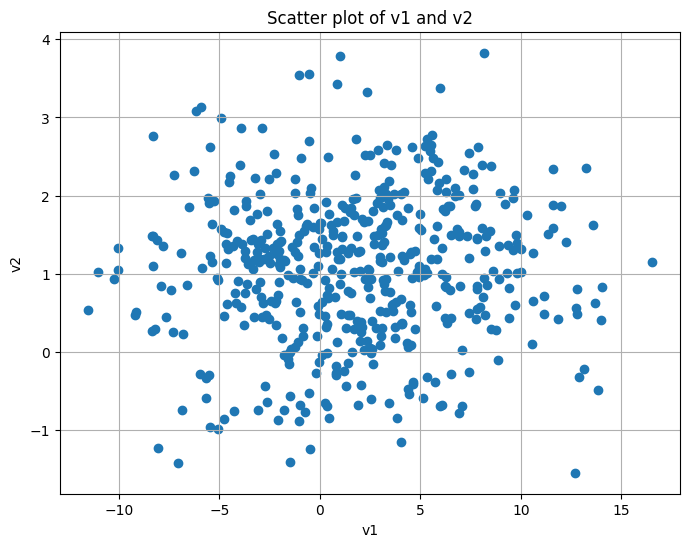

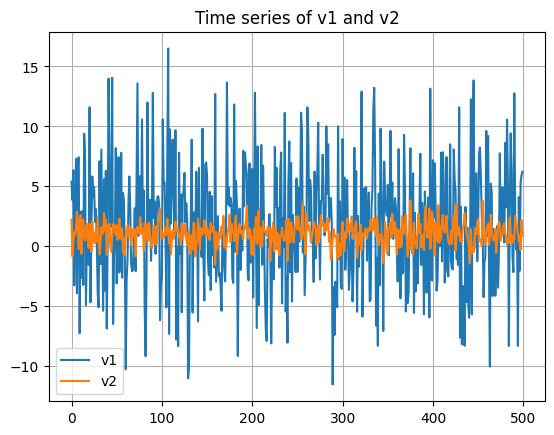

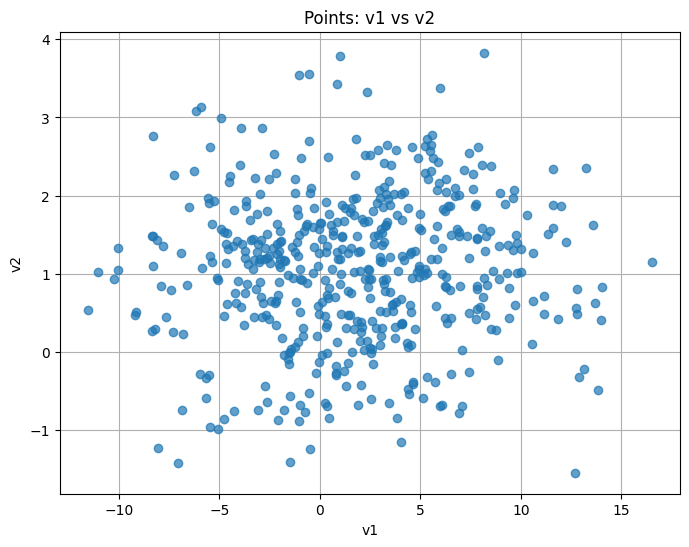

In [503]:
plt.figure(figsize=(8,6))
plt.scatter(v1, v2)
plt.xlabel('v1')
plt.ylabel('v2')
plt.title('Scatter plot of v1 and v2')
plt.grid()
plt.show()

plt.plot(v1, label='v1')
plt.plot(v2, label='v2')
plt.legend()
plt.title('Time series of v1 and v2')
plt.grid()
plt.show()

plt.figure(figsize=(8,6))
plt.plot(v1, v2, linestyle='None', marker='o', markersize=6, alpha=0.7)
plt.xlabel('v1')
plt.ylabel('v2')
plt.title('Points: v1 vs v2')
plt.grid(True)
plt.show()

> ***Question***
> - Do you *see* the lack of correlation between $v_1$ and $v_2$?

the data points from v1 and v2 are scattered randomly without any discernible pattern, indicating that there is no correlation between the two variables.

Let's analyze the probability density function (pdf) of this data set. The function [`plt.hist`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html) provides a discrete estimate of the pdf along a given dimension.

> ***Question***
> - Use `plt.hist` to compute and plot an estimation of the pdf of $v_1$ and $v_2$. Don't forget to adjust the number of bins.


sum v1: 865.1279822776231, sum v2: 532.0046031773722


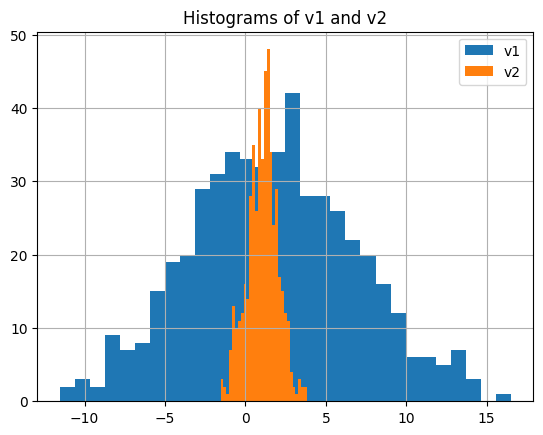

In [504]:
plt.hist(v1, bins=30, label='v1')
plt.hist(v2, bins=30, label='v2')
sum_v1 = np.sum(v1)
sum_v2 = np.sum(v2)
print(f'sum v1: {sum_v1}, sum v2: {sum_v2}')
plt.legend()
plt.title('Histograms of v1 and v2')
plt.grid()
plt.show()

/var/folders/n9/prphvb5j1jv1d98_009xr0th0000gn/T/ipykernel_46788/348036681.py:1: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([v1, v2], labels=['v1', 'v2'])


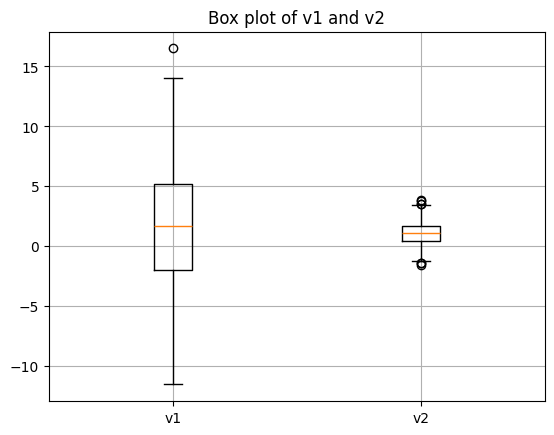

In [505]:
plt.boxplot([v1, v2], labels=['v1', 'v2'])
plt.title('Box plot of v1 and v2')
plt.grid()
plt.show()

We can also get a quick overview of the statistical distribution of the data with [box plot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.boxplot.html).

> ***Question***
> - What is the meaning of a box plot?
> - Try it on $v_1$

the meaning of a box plot is to provide a graphical summary of a dataset's distribution, highlighting central key stats like median, quartiles, and potential outliers. Also it helps to visualize the spread of the data.

## Pandas for advanced array manipulation

Compared to numpy which already handles arrays of numbers, Pandas essentially handles **metadata**. This will allow you to use predefined functions in pandas especially when it comes to time series manipulations. 

Pandas has a lot of other nice features like

- Intuitive handling of missing data (NaN)
- Input/output in many formats
- Simplified plotting procedures (labels, axes, etc. are added automatically)
- Better management of the memory

### Data download

If you are running a standalone version of the notebook, you will have to download the data first by running:

`!mkdir data`

`!wget -P data/ https://scrippsco2.ucsd.edu/assets/data/atmospheric/stations/in_situ_co2/daily/daily_in_situ_co2_mlo.csv`

and in case wget is not installed, you can install it with

!pip install wget

!python -m wget -o 'data/daily_in_situ_co2_mlo.csv' https://scrippsco2.ucsd.edu/assets/data/atmospheric/stations/in_situ_co2/daily/daily_in_situ_co2_mlo.csv
 

We are going to explore the basic functionalities of pandas with the historical CO2 measurements taken at Mona Loa also known as the [Keeling curve](https://en.wikipedia.org/wiki/Keeling_Curve). The data can be downloaded at [scrippsco2.ucsd.edu](http://scrippsco2.ucsd.edu) and we are going to analyze the daily output.

Take a moment to inspect the file that is located here `data/daily_in_situ_co2_mlo.csv` (either use a text editor or navigate within jupyter to open the file). Read the header to understand what is the data set about (you may have to investigate more to know about the units). 

> **Question**
> - Why is there NaN in the data set?

Some data of CO2 concentration are missing due to various reasons such as instrument malfunctions, maintenance periods, or adverse weather conditions that prevent accurate measurements.

In [506]:
import pandas as pd


We are going to use the function [`pd.read_csv`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) to import the data in python. It is very important to do a clean import of the data so that we can work efficiently afterwards. Pay extra attention to 
- the commented part in the header (hint: `comment`)
- add a name to each column. Use the names **year**, **month**, **day** for the corresponding columns. This way, pandas will directly recognize what they are (hint: `names`)
- pandas handles spaces in cvs files in a very specific way: you may need to adjust its behavior with `skipinitialspace`.

Use `pd.read_csv` to load the content of `data/daily_in_situ_co2_mlo.csv` into a DataFrame called `df`.

In [507]:
df = pd.read_csv('data/daily_in_situ_co2_mlo.csv', comment='%',names=["Year", "Month", "Day", "CO2", "NB", "scale"], skipinitialspace=True)

To access your data, you will need to know the metadata, i.e. the label of each column in the csv file (in this case provided by yourself). You can get a quick overview of your data by typing `df.head()` or `df.describe()`. You will see that the Dataframe `df` can be treated like a spreadsheet with labeled columns and entries for each column. You can view the labels with `df.columns` and the rows indices with `df.index`. Make sure you understand the type of each column of the dataset with `df.dtypes`. 

In [508]:
df.head(), df.describe(), df.columns, df.index

(   Year  Month  Day  CO2   NB  scale
 0  1958      1    1  NaN  0.0   12.0
 1  1958      1    2  NaN  0.0   12.0
 2  1958      1    3  NaN  0.0   12.0
 3  1958      1    4  NaN  0.0   12.0
 4  1958      1    5  NaN  0.0   12.0,
                Year         Month           Day           CO2            NB  \
 count  23284.000000  23284.000000  23284.000000  17162.000000  23283.000000   
 mean    1989.375880      6.505240     15.729213    358.803873      8.564919   
 std       18.403158      3.443673      8.800064     30.594377      7.323189   
 min     1958.000000      1.000000      1.000000    312.330000      0.000000   
 25%     1973.000000      4.000000      8.000000    330.650000      0.000000   
 50%     1989.000000      7.000000     16.000000    354.970000      8.000000   
 75%     2005.000000      9.000000     23.000000    385.405000     14.000000   
 max     2021.000000     12.000000     31.000000    420.290000     24.000000   
 
          scale  
 count  23284.0  
 mean      12

In [509]:
df["Year"]

0        1958
1        1958
2        1958
3        1958
4        1958
         ... 
23279    2021
23280    2021
23281    2021
23282    2021
23283    2021
Name: Year, Length: 23284, dtype: int64

You can select a column of the DataFrame by passing one name to `df` like `df["Year"]`. You can also select multiple columns by passing a list of names `df[["Year", "Month"]]`. To select specific rows, you need to use the metho `df.loc[i0:i1]` with `i0` and `i1`, the lower and upper bounds of the index. In our case we did not provide labels for the index so pandas automatically numbered the rows with a simple counter `0,1,...`. In that case, `i0` and `i1` are integers but we will see later that `i0` and `i1` can also be two dates (if the index is a date).

> ***Question***
> - Create a new DataFrame that contains only the first 100 entries and with the columns `Year` and `CO2` only.

In [510]:
df[["Year", "CO2"]].loc[:100]

,Year,CO2
0,1958,NaN
1,1958,NaN
2,1958,NaN
3,1958,NaN
4,1958,NaN
...,...,...
96,1958,NaN
97,1958,NaN
98,1958,315.9
99,1958,NaN


One killer feature of pandas is the way it handles time series. In order to use the full potential of such tool, one need to change the index to a date that is recognized by pandas. We use [`pd.to_datetime`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html) to combine the information in the year, month and day columns of the dataframe. `pd.to_datetime` handles several formats as input and you should be careful to use the correct input format. However, because we carefully chose the name of the columns when we imported the file, we can directly assemble the columns `Year`, `Month`, `Day` to create a new datetime object. You can follow the method in the [documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#assembling-datetime-from-multiple-dataframe-columns) to re-allocate `df.index` to a `datetime` type variable. Henceforth, we will use `df.index` to access the time dimension.

In [511]:
df.index

pd.to_datetime(df[["Year", "Month", "Day"]])


0       1958-01-01
1       1958-01-02
2       1958-01-03
3       1958-01-04
4       1958-01-05
           ...    
23279   2021-09-26
23280   2021-09-27
23281   2021-09-28
23282   2021-09-29
23283   2021-09-30
Length: 23284, dtype: datetime64[ns]

> ***Question (Optional)***
> - Note that one could have done this operation directly while reading the data. Use `parse_dates` in `pd.read_csv` to create a datetime object in `df`. Try it.

In [512]:
pd.read_csv('data/daily_in_situ_co2_mlo.csv', comment='%',names=["Year", "Month", "Day", "CO2", "NB", "scale"], skipinitialspace=True, parse_dates=[["Year", "Month", "Day"]], index_col=0)


/var/folders/n9/prphvb5j1jv1d98_009xr0th0000gn/T/ipykernel_46788/2744996687.py:1: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  pd.read_csv('data/daily_in_situ_co2_mlo.csv', comment='%',names=["Year", "Month", "Day", "CO2", "NB", "scale"], skipinitialspace=True, parse_dates=[["Year", "Month", "Day"]], index_col=0)


,CO2,NB,scale
Year_Month_Day,,,
1958-01-01,NaN,0.0,12.0
1958-01-02,NaN,0.0,12.0
1958-01-03,NaN,0.0,12.0
1958-01-04,NaN,0.0,12.0
1958-01-05,NaN,0.0,12.0
...,...,...,...
2021-09-26,NaN,0.0,12.0
2021-09-27,NaN,0.0,12.0
2021-09-28,NaN,0.0,12.0


Now `df.index` contain [Timestamp](https://pandas.pydata.org/docs/reference/api/pandas.Timestamp.html)s. You can quickly access the day, month, year of the records by using `df.index.day`, `df.index.month` `df.index.year` (etc. see documentation). You can also construct time intervals (or [timedetla](https://pandas.pydata.org/docs/reference/api/pandas.Timedelta.html)s) by subtracting two timestamps

> ***Question***
> - Subtract the first index to the last index to know how many days are in this data set

In [513]:
df.index[-1] - df.index[0]

23283

You can now select specific rows of your dataset by passing dates to the `.loc[]` method, as in `.loc[date0:date1]`. The two dates `date0` and `date1` can be written as strings in the format `'YYYY-MM-DD'` (e.g. `'2020-09-20'`) or simply `'YYYY-MM'`. 

If `date0` is only `'2020-09'` (you are missing the days), Pandas will interpret it as the first day of September 2020. Note that Pandas can also interpret `'2020-09'` as the whole month of September 2020 if this is the only argument as in `.loc[date0]`.

> ***Question***
> - Select the whole month of September 2020 with two different methods


In [514]:
print(type(df.index))
print(df.index[:5])

<class 'pandas.core.indexes.range.RangeIndex'>
RangeIndex(start=0, stop=5, step=1)


In [515]:
df.index = pd.to_datetime(df[['Year', 'Month', 'Day']])

In [516]:
# Sélection du mois de septembre 2020 avec deux méthodes
df_sept_2020_method1 = df.loc['2020-09']
df_sept_2020_method2 = df[(df.index.year == 2020) & (df.index.month == 9) & (df.index.day >= 1) & (df.index.day <= 30)]

Pandas has built-in plotting features that are based on matplotlib. Since you now master matplotlib, you will find it very easy to plot data within pandas. 

> ***Question***
> - Plot the CO2 time series as a function of time. (Hint: select the column of interest in df and simply apply the method `.plot()`)

<Axes: title={'center': 'CO2 concentration over time'}>

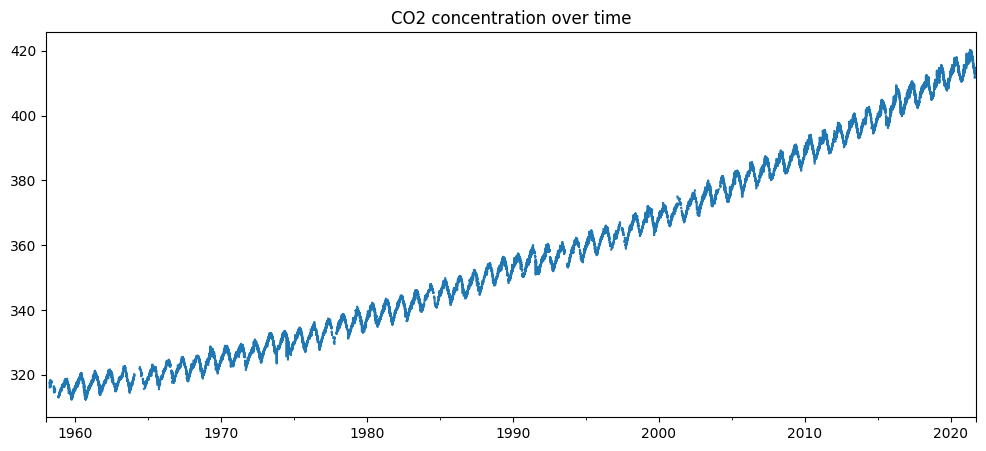

In [517]:
# Plot the CO2 time series as a function of time
df["CO2"].plot(figsize=(12,5), title="CO2 concentration over time")

The CO2 curve is increasing. This is not really a surprised isn't it?. However, we also notice wiglly patterns superimposed to this trend. Are we looking at noisy data are does it have a physical meaning?

> ***Question***
> - In order to get a closer look, can you plot only 2 years of the CO2 time series between Jan 1st 2000 and Jan 1st 2002?

<Axes: title={'center': 'CO2 concentration 2000-2002'}>

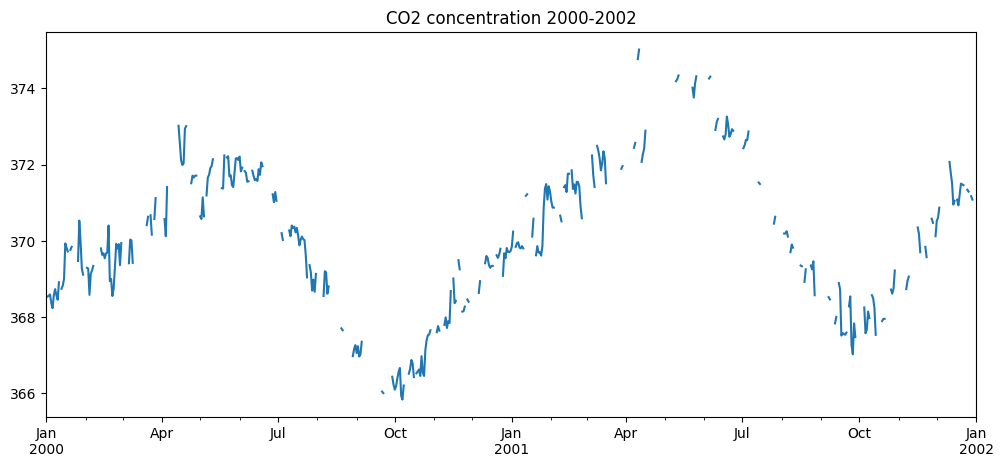

In [518]:
# Plot only 2 years of the CO2 time series between Jan 1st 2000 and Jan 1st 2002
df.loc["2000-01-01":"2002-01-01", "CO2"].plot(figsize=(12,5), title="CO2 concentration 2000-2002")

So there seem to be a lot of variability and many missing data in this data set. We can try to average all available data for each single year that we have. That way we will probably see a smoother curve. The [`resample`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.resample.html) function is here to create a new time series with the desired sampling frequency. The acronym for standard time intervals are listed in the [Time series documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases). You need to either add the method `.mean()` or `.sum()` to the resampled data to indicate how to treat the data in the resampling interval.

> ***Question***
> - Plot the yearly average evolution of the CO2 concentration.

<Axes: title={'center': 'Yearly average CO2 concentration'}>

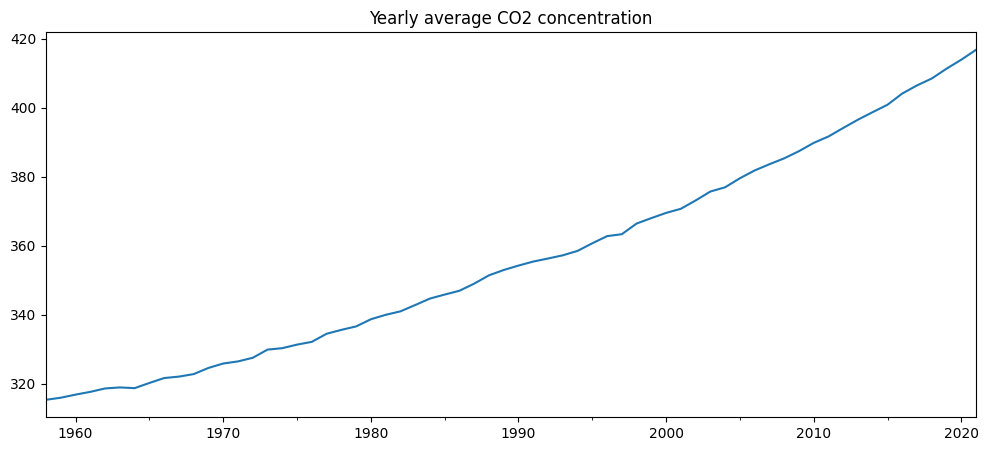

In [519]:
# Plot the yearly average evolution of the CO2 concentration
df["CO2"].resample('YE').mean().plot(figsize=(12,5), title="Yearly average CO2 concentration")

These wiggles are not random but are the actual annual cycle of the data.
> ***Question (Optional)***
> - Use the method `.groupby` to plot the annual cycle
> - Discuss the physical origin of this anual cycle

<Axes: title={'center': 'Mean annual cycle of CO2 concentration'}>

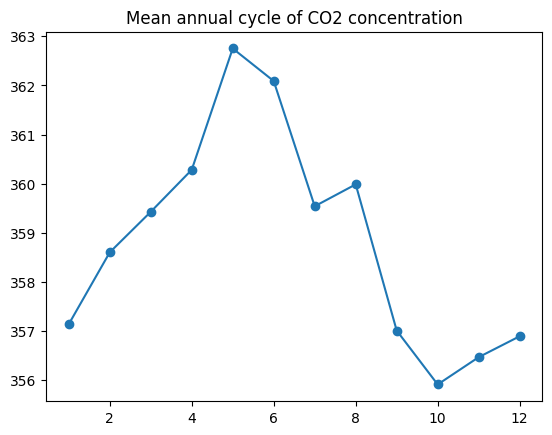

In [520]:
# Plot the annual cycle using groupby (optional)
df["CO2"].groupby(df.index.month).mean().plot(marker='o', title="Mean annual cycle of CO2 concentration")

## Scikit-learn for data analysis

[Scikit-learn](https://scikit-learn.org/) will be our toolbox for all statistical analysis. It provides the most popular machine learning algorithm, is well documented and has an active user community. Scikit learn does not work well with missing data. So in order to have a smooth transition between pandas and scikit-learn, it is convenient to create a copy of your DataFrame without any `NaN`. Make sure you use (and understand) the [`.copy()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.copy.html) method to create the new array because we are going to make modification to this new DataFrame. You can call this new DataFrame `dfv`.

In [521]:
dfv = df.dropna().copy()

Because we cannot do a linear regression with dates as indices, we need to create an additional column that contains the day number since the begining of the dataset. Remember how we worked with timedelta (and broadcasting) above?

> ***Question***
> - Can you create this new column and name it `counter`?

*Be careful that this new variable must have dtype int (or float) and not a timedelta. (Hint: look at the [attributes of timedelta](https://pandas.pydata.org/pandas-docs/stable/user_guide/timedeltas.html#attributes))*

In [522]:
# Création de la colonne 'counter' : nombre de jours depuis le début du dataset
print('Premières dates du DataFrame :', dfv.index[:3])
dfv["counter"] = (dfv.index - dfv.index[0]).days
print('Extrait de la colonne counter :')
print(dfv[["counter"]].head())

Premières dates du DataFrame : DatetimeIndex(['1958-03-30', '1958-03-31', '1958-04-02'], dtype='datetime64[ns]', freq=None)
Extrait de la colonne counter :
            counter
1958-03-30        0
1958-03-31        1
1958-04-02        3
1958-04-03        4
1958-04-04        5


We are now ready to use the [linear regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) module.

In [523]:
from sklearn.linear_model import LinearRegression

We are first going to [fit](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.fit) the data. As explained in the documentation, this function takes at least two arguments: the predictors and the observations. Predictors must be a 2d array of shape (n_samples, n_features), **even if there is only ONE feature**. One simple way to achieve this is to select a list of only one variable in the DataFrame (i.e. `dfv[["counter"]]`, note the usage of double brackets here).

> ***Question***
> - Create the input variable `X` (day since first record) and the output variable `y` (CO2 concentration)
> - Perform the linear regression and put the output in the variable `reg`.

In [524]:
# Variables pour la régression linéaire
X = dfv[["counter"]]  # 2D array (n_samples, 1)
y = dfv["CO2"]
print('Aperçu de X (jours depuis le début) :')
print(X.head())
print('Aperçu de y (CO2) :')
print(y.head())
reg = LinearRegression().fit(X, y)
print('Régression linéaire entraînée.')

Aperçu de X (jours depuis le début) :
            counter
1958-03-30        0
1958-03-31        1
1958-04-02        3
1958-04-03        4
1958-04-04        5
Aperçu de y (CO2) :
1958-03-30    316.16
1958-03-31    316.69
1958-04-02    317.67
1958-04-03    317.76
1958-04-04    317.09
Name: CO2, dtype: float64
Régression linéaire entraînée.


> ***Question***
> - What is the value of the regression coefficient?
> - What is its physical meaning?

In [525]:
# Affichage du coefficient de régression et de son interprétation
print(f"Coefficient (pente) : {reg.coef_[0]:.4f} ppm/jour")
print(f"Cela correspond à une augmentation annuelle de {reg.coef_[0]*365:.2f} ppm/an")
print(f"Ordonnée à l'origine (intercept) : {reg.intercept_:.2f} ppm")

Coefficient (pente) : 0.0044 ppm/jour
Cela correspond à une augmentation annuelle de 1.62 ppm/an
Ordonnée à l'origine (intercept) : 305.26 ppm


> ***Question***
> - Use the method `.predict` to construct the predicted value at all observation times and add it to the `dfv` DataFrame.

In [526]:
# Ajout de la prédiction dans le DataFrame
dfv["CO2_fit"] = reg.predict(dfv[["counter"]])
print('Extrait des valeurs observées et prédites :')
print(dfv[["CO2", "CO2_fit"]].head())

Extrait des valeurs observées et prédites :
               CO2     CO2_fit
1958-03-30  316.16  305.260510
1958-03-31  316.69  305.264939
1958-04-02  317.67  305.273796
1958-04-03  317.76  305.278225
1958-04-04  317.09  305.282654


> ***Question***
> - Plot the observed value along with your prediction on a single plot.

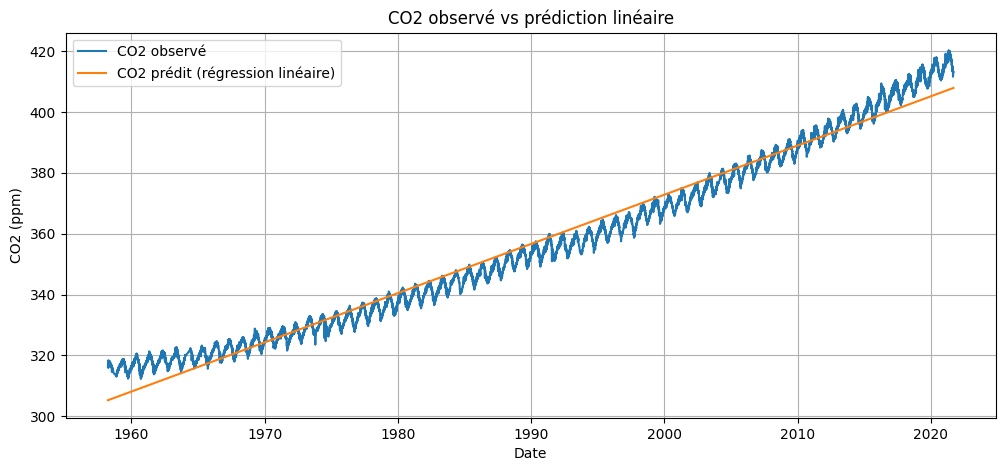

In [527]:
# Affichage de la valeur observée et de la prédiction sur un même graphique
import matplotlib.pyplot as plt
plt.figure(figsize=(12,5))
plt.plot(dfv.index, dfv["CO2"], label="CO2 observé")
plt.plot(dfv.index, dfv["CO2_fit"], label="CO2 prédit (régression linéaire)")
plt.xlabel("Date")
plt.ylabel("CO2 (ppm)")
plt.title("CO2 observé vs prédiction linéaire")
plt.legend()
plt.grid()
plt.show()

It is now super easy to compute the co2 growth rate in ppm/year for several time periods.
> ***Question***
> - Perform 2 linear regressions: one between 1960 and 1980 and one between 2000 and 2020 and compare how the growth rate evolved over time.
> - Can you give an estimate of the CO2 concentration in 2050?


Croissance 1960-1980 : 0.0029 ppm/jour soit 1.05 ppm/an
Croissance 2000-2020 : 0.0060 ppm/jour soit 2.19 ppm/an


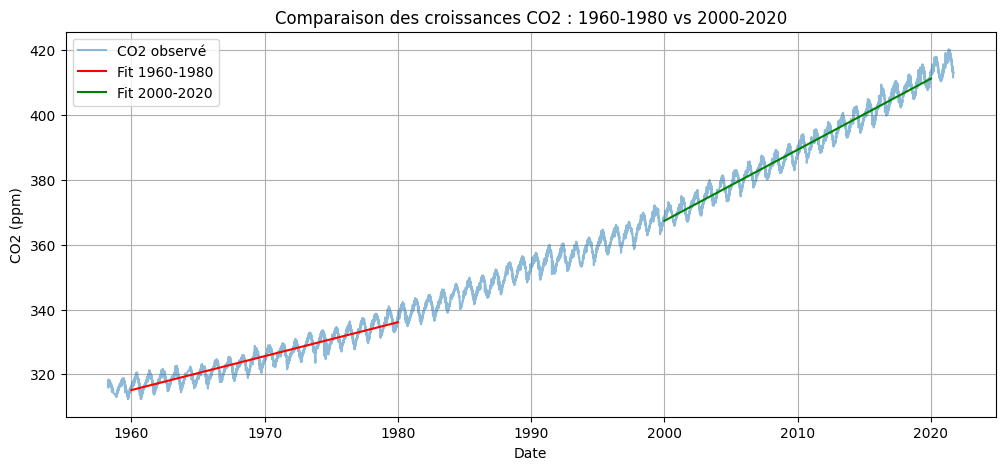

Estimation du CO2 en 2050 (avec la pente 2000-2020) : 477.04 ppm


In [528]:
# Régressions linéaires sur deux périodes et affichage détaillé
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

# Sélection des sous-ensembles
mask_1960_1980 = (dfv.index.year >= 1960) & (dfv.index.year < 1980)
mask_2000_2020 = (dfv.index.year >= 2000) & (dfv.index.year < 2020)

# Régression 1960-1980
X_1960_1980 = dfv.loc[mask_1960_1980, ["counter"]]
y_1960_1980 = dfv.loc[mask_1960_1980, "CO2"]
reg_1960 = LinearRegression().fit(X_1960_1980, y_1960_1980)

# Régression 2000-2020
X_2000_2020 = dfv.loc[mask_2000_2020, ["counter"]]
y_2000_2020 = dfv.loc[mask_2000_2020, "CO2"]
reg_2000 = LinearRegression().fit(X_2000_2020, y_2000_2020)

print("Croissance 1960-1980 : {:.4f} ppm/jour soit {:.2f} ppm/an".format(reg_1960.coef_[0], reg_1960.coef_[0]*365))
print("Croissance 2000-2020 : {:.4f} ppm/jour soit {:.2f} ppm/an".format(reg_2000.coef_[0], reg_2000.coef_[0]*365))

# Affichage des deux fits sur la période totale
plt.figure(figsize=(12,5))
plt.plot(dfv.index, dfv["CO2"], label="CO2 observé", alpha=0.5)
plt.plot(X_1960_1980.index, reg_1960.predict(X_1960_1980), label="Fit 1960-1980", color='red')
plt.plot(X_2000_2020.index, reg_2000.predict(X_2000_2020), label="Fit 2000-2020", color='green')
plt.xlabel("Date")
plt.ylabel("CO2 (ppm)")
plt.title("Comparaison des croissances CO2 : 1960-1980 vs 2000-2020")
plt.legend()
plt.grid()
plt.show()

# Estimation pour 2050 avec la pente récente
jours_2050 = (np.datetime64('2050-01-01') - dfv.index[0]).days
co2_2050 = reg_2000.intercept_ + reg_2000.coef_[0]*jours_2050
print(f"Estimation du CO2 en 2050 (avec la pente 2000-2020) : {co2_2050:.2f} ppm")

Idée supplémentaire: Estimer le CO2 en 2050 avec une pente predite par les deux pentes précédentes. Par exemple, si la pente 2000-2020 est 1.5 fois plus grande que la pente 1960-1980, on peut imaginer que la pente 2020-2050 sera 1.5 fois plus grande que la pente 2000-2020.

In [529]:
# Prédiction de la pente future (2030-2050) par extrapolation des pentes précédentes
# On suppose que l'accélération de la croissance continue au même rythme
pente_1960_1980 = reg_1960.coef_[0]
pente_2000_2020 = reg_2000.coef_[0]
# Calcul de l'accélération moyenne par an entre les deux périodes
annees_1 = 1980 - 1960
annees_2 = 2020 - 2000
acceleration = (pente_2000_2020 - pente_1960_1980) / (2000 - 1980)  # variation de la pente par an entre 1980 et 2000
print(f"Accélération moyenne de la pente (1980-2000) : {acceleration:.6f} ppm/jour/an")
# Extrapolation de la pente pour 2030-2050
annees_3 = 2050 - 2030
pente_2030_2050 = pente_2000_2020 + acceleration * (2030 - 2020)
print(f"Pente estimée pour 2030-2050 : {pente_2030_2050:.6f} ppm/jour")
# Prédiction du CO2 en 2050 en utilisant la nouvelle pente estimée
jours_2030 = (np.datetime64('2030-01-01') - dfv.index[0]).days
jours_2050 = (np.datetime64('2050-01-01') - dfv.index[0]).days
co2_2030 = reg_2000.intercept_ + reg_2000.coef_[0]*jours_2030
co2_2050_pred = co2_2030 + pente_2030_2050 * (jours_2050 - jours_2030)
print(f"Estimation du CO2 en 2050 (avec la pente projetée 2030-2050) : {co2_2050_pred:.2f} ppm")

Accélération moyenne de la pente (1980-2000) : 0.000157 ppm/jour/an
Pente estimée pour 2030-2050 : 0.007575 ppm/jour
Estimation du CO2 en 2050 (avec la pente projetée 2030-2050) : 488.51 ppm


In [ ]:
# Affichage des trois pentes (fits) sur la période totale, y compris la pente projetée 2030-2050
plt.figure(figsize=(12,5))
plt.plot(dfv.index, dfv["CO2"], label="CO2 observé", alpha=0.5)
plt.plot(X_1960_1980.index, reg_1960.predict(X_1960_1980), label="Fit 1960-1980", color='red')
plt.plot(X_2000_2020.index, reg_2000.predict(X_2000_2020), label="Fit 2000-2020", color='green')
# Fit projeté 2030-2050
# On trace la droite à partir de 2030 jusqu'à 2050 avec la nouvelle pente
import pandas as pd
dates_proj = pd.date_range(start='2030-01-01', end='2050-01-01', freq='D')
jours_proj = (dates_proj - dfv.index[0]).days.values
co2_proj = co2_2030 + pente_2030_2050 * (jours_proj - (jours_2030))
plt.plot(dates_proj, co2_proj, label="Fit projeté 2030-2050", color='blue', linestyle='--', linewidth=2)
plt.xlabel("Date")
plt.ylabel("CO2 (ppm)")
plt.title("Comparaison des croissances CO2 : 1960-1980, 2000-2020, 2030-2050 (projection)")
plt.legend()
plt.grid()
plt.show()

***
## Credit

[//]: # "This notebook is part of [E4C Interdisciplinary Center - Education](https://gitlab.in2p3.fr/energy4climate/public/education)."
Contributors include Bruno Deremble and Alexis Tantet.

<br>

<div style="display: flex; height: 70px">
    
<img alt="Logo LMD" src="images/logos/logo_lmd.jpg" style="display: inline-block"/>

<img alt="Logo IPSL" src="images/logos/logo_ipsl.png" style="display: inline-block"/>

<img alt="Logo E4C" src="images/logos/logo_e4c_final.png" style="display: inline-block"/>

<img alt="Logo EP" src="images/logos/logo_ep.png" style="display: inline-block"/>

<img alt="Logo SU" src="images/logos/logo_su.png" style="display: inline-block"/>

<img alt="Logo ENS" src="images/logos/logo_ens.jpg" style="display: inline-block"/>

<img alt="Logo CNRS" src="images/logos/logo_cnrs.png" style="display: inline-block"/>
    
</div>

<hr>

<div style="display: flex">
    <a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/"><img alt="Creative Commons License" style="border-width:0; margin-right: 10px" src="https://i.creativecommons.org/l/by-sa/4.0/88x31.png" /></a>
    <br>This work is licensed under a &nbsp; <a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/">Creative Commons Attribution-ShareAlike 4.0 International License</a>.
</div>